In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_transaction = pd.read_excel('ANZ synthesised transaction dataset.xlsx')

## Data Checking

In [3]:
df_transaction.shape

(12043, 23)

In [4]:
df_transaction.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [5]:
df_transaction.describe(include=['O'])

,status,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,first_name,gender,merchant_suburb,merchant_state,extraction,transaction_id,country,customer_id,merchant_long_lat,movement
count,12043,885,12043,12043,12043,12043,7717,12043,12043,7717,7717,12043,12043,12043,12043,7717,12043
unique,2,3,100,1,100,6,5725,80,2,1609,8,9442,12043,1,100,2703,2
top,authorized,0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,106e1272-44ab-4dcb-a438-dd98e0071e51,Michael,M,Melbourne,NSW,2018-09-03T11:00:00.000+0000,31533e5ac63b4f39b742c915304264ef,Australia,CUS-2487424745,151.21 -33.87,debit
freq,7717,883,578,12043,578,3934,14,746,6285,255,2169,10,1,12043,578,145,11160


In [51]:
df_transaction.isnull().sum()

status                   0
card_present_flag     4282
bpay_biller_code     11042
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4282
merchant_code        11044
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4282
merchant_state        4282
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4282
movement                 0
trans_time               0
trans_hour               0
trans_month              0
trans_day_of_week        0
long                     0
lat                      0
geometry                 0
dtype: int64

In [53]:
df_transaction.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement', 'trans_time', 'trans_hour', 'trans_month',
       'trans_day_of_week', 'long', 'lat', 'geometry'],
      dtype='object')

In [48]:
#no valubable merchant_id transaction
df_transaction.loc[(df_transaction.merchant_code.notnull() & df_transaction.merchant_code != 0.0)]

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,customer_id,merchant_long_lat,movement,trans_time,trans_hour,trans_month,trans_day_of_week,long,lat,geometry


In [8]:
df_transaction.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


## Data Wrangling

In [9]:
#Convert given date time into datetime obj
df_transaction['extraction'] = pd.to_datetime(df_transaction['extraction'])

In [10]:
# Extract time of transaction
df_transaction['trans_time'] = df_transaction['extraction'].dt.time

In [11]:
#Extract the hour of transaction
df_transaction['trans_hour'] = df_transaction['extraction'].dt.hour

In [12]:
#Extract the month of transactoin
df_transaction['trans_month'] = df_transaction['extraction'].dt.month

In [13]:
#Extract the day of week of the trasncation
df_transaction['trans_day_of_week'] = df_transaction['extraction'].dt.day_name()

In [54]:
#Converting lat and long into geopoints
df_transaction[['long', 'lat']] = df_transaction['long_lat'].str.split(' ', 1, expand=True)
df_transaction[['long', 'lat']] = df_transaction[['long', 'lat']].apply(pd.to_numeric)

In [55]:
#Converting lat and long into geopoints
df_transaction[['merc_long', 'merc_lat']] = df_transaction['merchant_long_lat'].str.split(' ', 1, expand=True)
df_transaction[['merc_long', 'merc_lat']] = df_transaction[['merc_long', 'merc_lat']].apply(pd.to_numeric)

## Data Analysis

### Transaction done by time

In [15]:
#Count & Avg of transaction per day of week
df_transaction.groupby('trans_day_of_week')['amount'].agg(['count','mean'])

,count,mean
trans_day_of_week,,
Friday,2073,249.353517
Monday,1360,373.221000
Saturday,1709,54.419286
Sunday,1550,53.015845
Thursday,1801,184.010422
Tuesday,1487,221.576456
Wednesday,2063,195.215570


<Figure size 432x288 with 0 Axes>

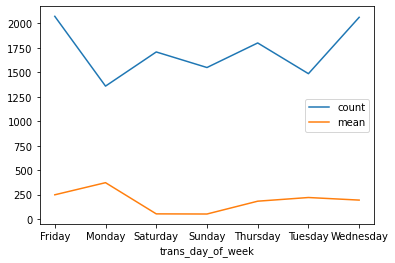

In [16]:
#Plot showing the count and mean value of transactions per day of week
plt.figure(); df_transaction.groupby('trans_day_of_week')['amount'].agg(['count','mean']).plot(); plt.legend(loc='best')

In [17]:
#Total value of transaction done per day
df_transaction.groupby('trans_day_of_week')['amount'].sum()

trans_day_of_week
Friday       516909.84
Monday       507580.56
Saturday      93002.56
Sunday        82174.56
Thursday     331402.77
Tuesday      329484.19
Wednesday    402729.72
Name: amount, dtype: float64

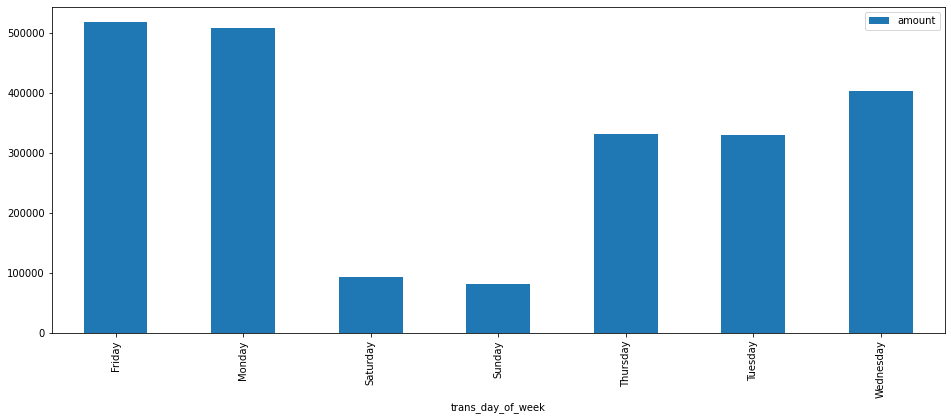

In [18]:
#Plot showing total value of transaction done per day of week
plt.figure(figsize=(16,6)); df_transaction.groupby('trans_day_of_week')['amount'].sum().plot(kind='bar'); plt.legend(loc='best')

In [19]:
# Avg amount of transaction per day of week
# df_transaction.groupby('trans_day_of_week')['amount'].mean()

In [20]:
#Count & Avg of transactions per month
df_transaction.groupby('trans_month')['amount'].agg(['count','mean'])

,count,mean
trans_month,,
8,3943,185.121867
9,4013,182.045903
10,4087,196.427323


<Figure size 432x288 with 0 Axes>

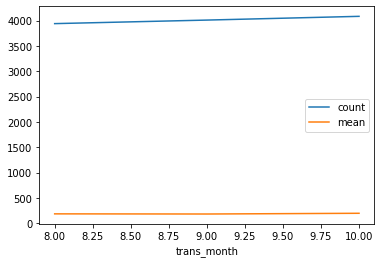

In [21]:
#Plot showing total value of transaction done per month
plt.figure(); df_transaction.groupby('trans_month')['amount'].agg(['count','mean']).plot(); plt.legend(loc='best')

In [22]:
temp = df_transaction.groupby('trans_month')['amount'].agg(['sum'])

<Figure size 432x288 with 0 Axes>

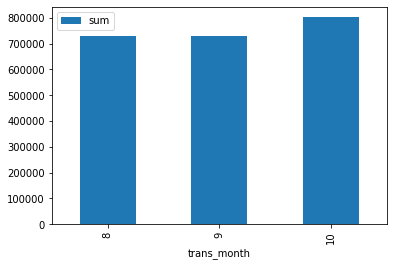

In [23]:
##TO DO: plot the total amount, use lat and long to get area info 
#Plot showing total value of transaction done per month
plt.figure(); df_transaction.groupby('trans_month')['amount'].agg(['sum']).plot(kind='bar'); plt.legend(loc='best')

In [24]:
# #Avg of transactions per month
# df_transaction.groupby('trans_month')['amount'].mean()

In [25]:
#Count of transaction per hour
df_transaction.groupby('trans_hour')['amount'].agg(['count','mean'])

,count,mean
trans_hour,,
0,108,28.274907
1,214,48.716402
2,212,75.269764
3,196,84.725918
4,309,61.301845
5,209,64.524641
6,249,59.205261
7,266,72.927256
8,547,43.749159


<Figure size 432x288 with 0 Axes>

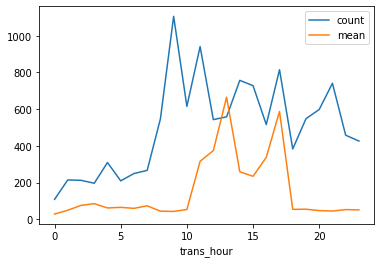

In [26]:
plt.figure(); df_transaction.groupby('trans_hour')['amount'].agg(['count','mean']).plot(); plt.legend(loc='best')

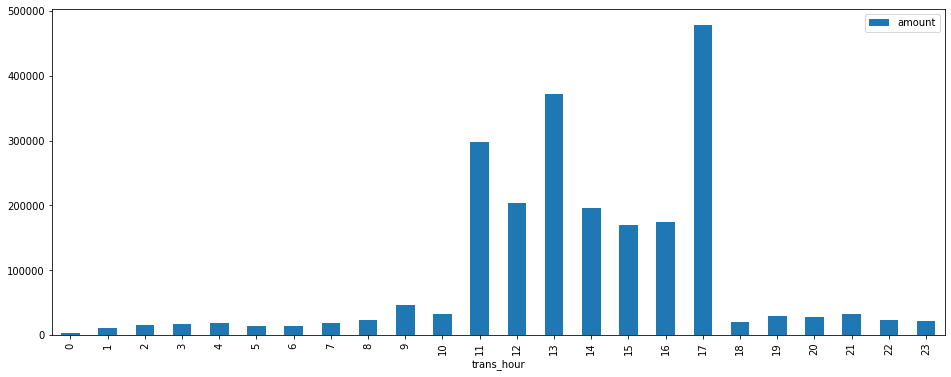

In [27]:
plt.figure(figsize=(16,6)); df_transaction.groupby('trans_hour')['amount'].sum().plot(kind='bar'); plt.legend(loc='best')

### Transaction done by state and gender

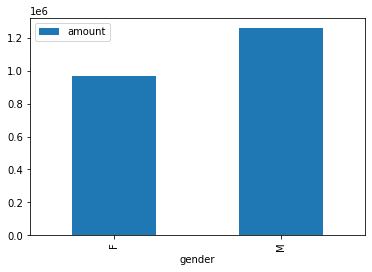

In [58]:
#Total amount spent by gender
plt.figure();df_transaction.groupby('gender')['amount'].sum().plot(kind='bar'); plt.legend(loc='best')

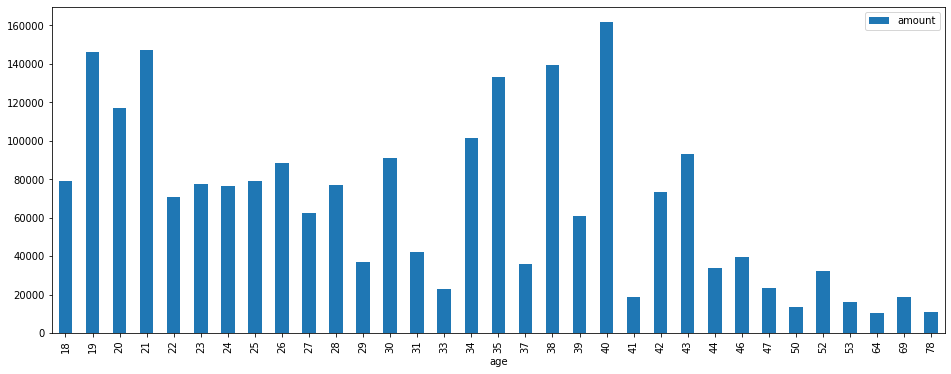

In [56]:
#Total amount spent by age
plt.figure(figsize=(16,6));df_transaction.groupby('age')['amount'].sum().plot(kind='bar'); plt.legend(loc='best')

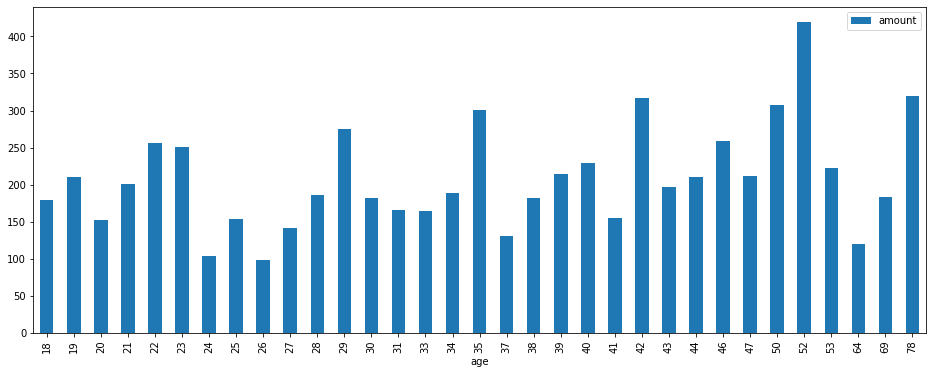

In [57]:
# Avg transaction amount per age group.
plt.figure(figsize=(16,6));df_transaction.groupby('age')['amount'].mean().plot(kind='bar'); plt.legend(loc='best')

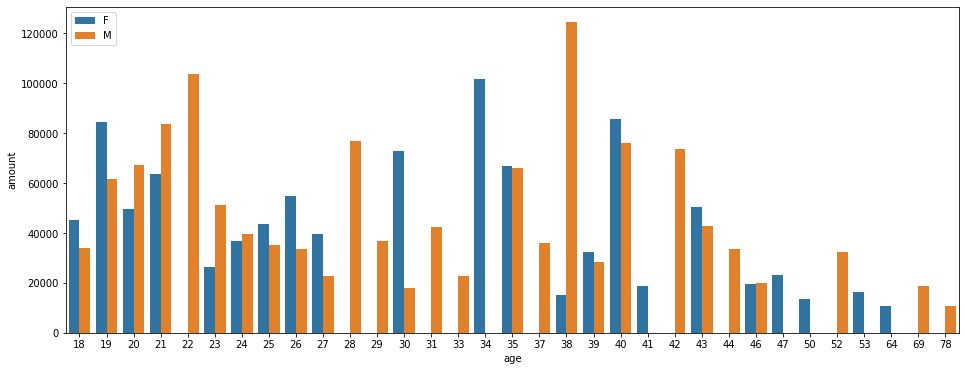

In [30]:
#Total amount by age and gender
plt.figure(figsize=(16,6));sns.barplot(y='amount',x='age',hue='gender',\
                                      data = df_transaction.groupby(['gender','age'])['amount'].sum().reset_index()); plt.legend(loc='best')

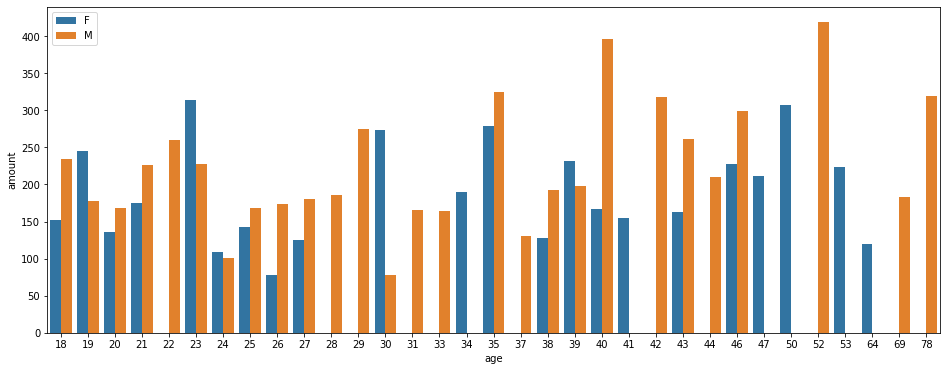

In [31]:
#Avg amount by age and gender
plt.figure(figsize=(16,6));sns.barplot(y='amount',x='age',hue='gender',\
                                      data = df_transaction.groupby(['gender','age'])['amount'].mean().reset_index()); plt.legend(loc='best')

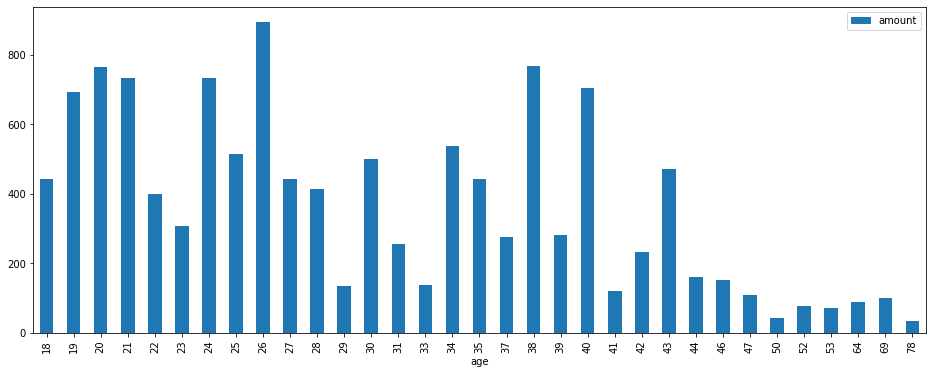

In [32]:
#Count of transaction done by age
plt.figure(figsize=(16,6));df_transaction.groupby('age')['amount'].count().plot(kind='bar'); plt.legend(loc='best')

In [33]:
df_transaction.groupby('merchant_state')['amount'].sum()

merchant_state
ACT      4876.68
NSW    102021.77
NT       9168.89
QLD     53483.45
SA      16776.57
TAS      1962.93
VIC     87584.00
WA      33992.06
Name: amount, dtype: float64

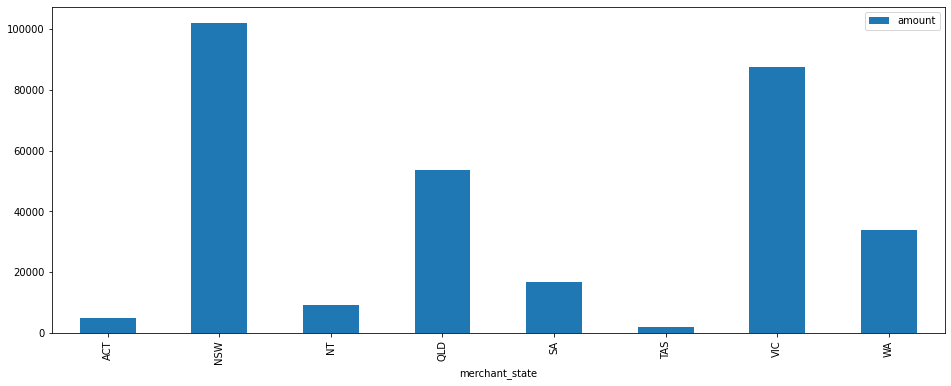

In [34]:
plt.figure(figsize=(16,6));df_transaction.groupby('merchant_state')['amount'].sum().plot(kind='bar'); plt.legend(loc='best')

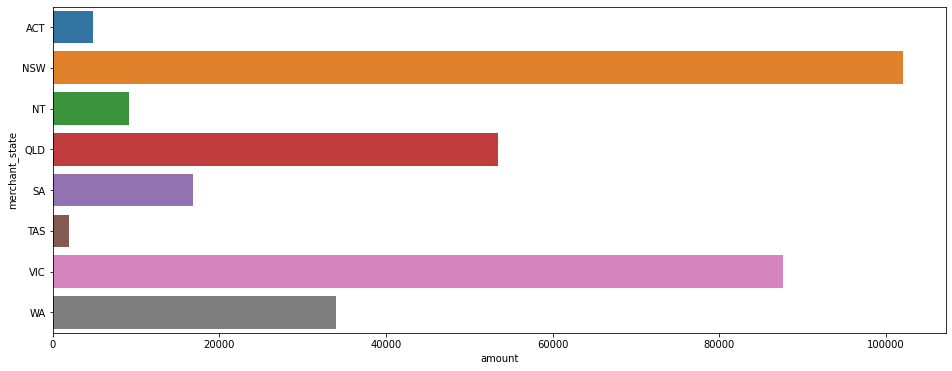

In [35]:
#division of total amount by state
plt.figure(figsize=(16,6));sns.barplot(x="amount", y="merchant_state",\
                                       data=df_transaction.groupby('merchant_state')['amount'].sum().reset_index())

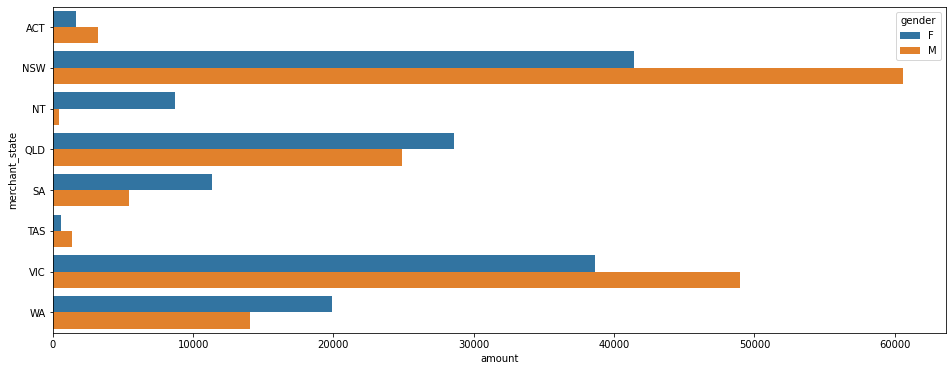

In [36]:
#Division of total amount y state and gender
plt.figure(figsize=(16,6));sns.barplot(x='amount', y='merchant_state', hue='gender',\
                                       data=df_transaction.groupby(['merchant_state','gender'])['amount'].sum().reset_index())

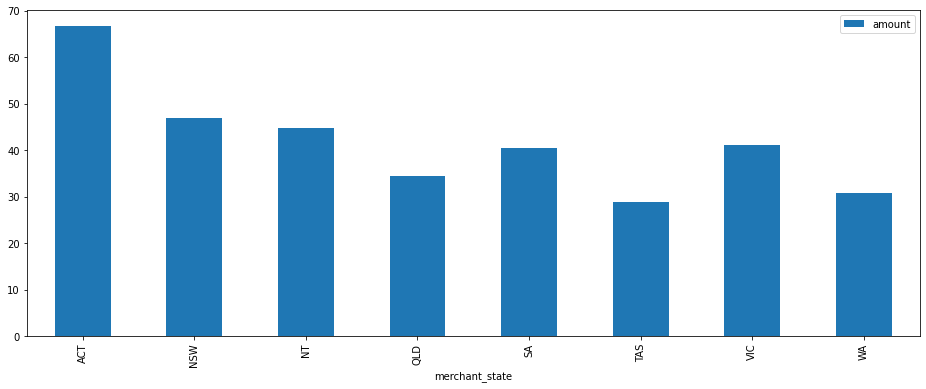

In [37]:
#Ave transaction amount by merchant state
plt.figure(figsize=(16,6));df_transaction.groupby('merchant_state')['amount'].mean().plot(kind='bar'); plt.legend(loc='best')

### Location

In [38]:
#selecting australia
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
aus =  world[world.name == "Australia"]

In [39]:
#Fradualent transaction, all the names are same
df_transaction.loc[df_transaction.lat == -573.0].describe(include=['O'])

,status,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,first_name,gender,merchant_suburb,merchant_state,transaction_id,country,customer_id,merchant_long_lat,movement,trans_time,trans_day_of_week
count,123,7,123,123,123,123,79,123,123,79,79,123,123,123,79,123,123,123
unique,2,1,1,1,1,5,76,1,1,54,6,123,1,1,62,2,84,7
top,authorized,0,ACC-2901672282,AUD,255.00 -573.00,SALES-POS,ac9555e4-9c7c-486b-9e65-07e2e918dd0b,Daniel,M,Sydney,NSW,64733ce8979142feaaf6733e5fba2c39,Australia,CUS-1617121891,151.21 -33.87,debit,17:00:00,Wednesday
freq,79,7,123,123,123,41,2,123,123,17,39,1,123,123,13,116,22,29


In [40]:
df_transaction.drop(df_transaction[df_transaction.lat== -573.0].index, inplace=True)

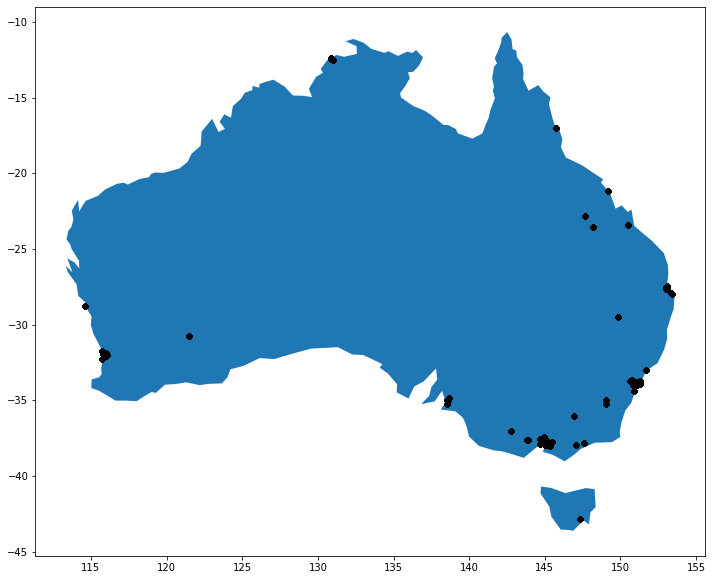

In [60]:
geometry = [Point(xy) for xy in zip(df_transaction['long'], df_transaction['lat'])]
gdf = GeoDataFrame(df_transaction, geometry=geometry)
gdf.plot(ax=aus.plot(figsize=(12, 12)), marker='o', color='black', markersize=20)

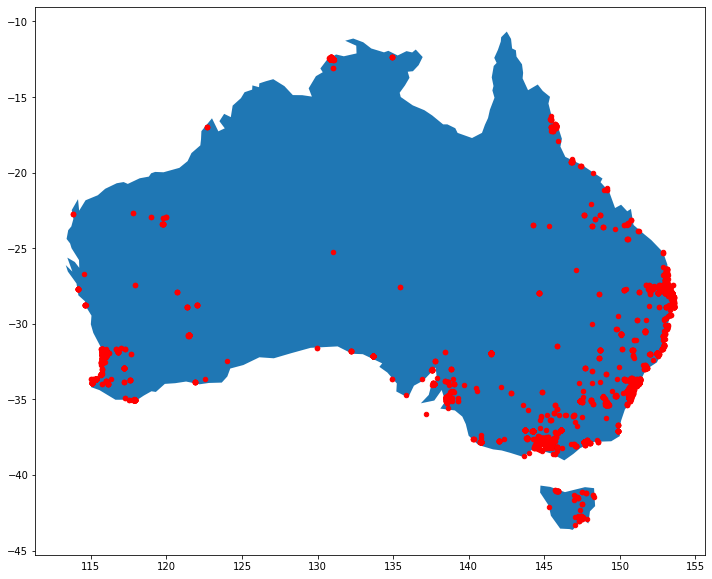

In [73]:
geometry = [Point(xy) for xy in zip(df_transaction['merc_long'], df_transaction['merc_lat'])]
gdf = GeoDataFrame(df_transaction, geometry=geometry)
gdf.plot(ax=aus.plot(figsize=(12, 12)), marker='o', color='red', markersize=20)

## Insights